# 1. Preparing the Environement

## 1.1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## 1.2. Importing the Data

Importing the data while making the ID column as the index column

In [2]:
df_customers = pd.read_csv('C:\\Users\\noure\\Desktop\\Nour\\University\\Corvinus\\Master2\\S1\\thesis\\Dataset\\Customer.csv', index_col=0)

df_purchase = pd.read_csv('C:\\Users\\noure\\Desktop\\Nour\\University\\Corvinus\\Master2\\S1\\thesis\\Dataset\\purchase data.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2. Demographic Segmentation of Customers

## 2.1. Descriptive Statistics 

In [3]:
df_customers.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_customers.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df_customers.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.46,0.50,35.91,1.04,120954.42,0.81,0.74
std,0.50,0.50,11.72,0.60,38108.82,0.64,0.81
min,0.00,0.00,18.00,0.00,35832.00,0.00,0.00
25%,0.00,0.00,27.00,1.00,97663.25,0.00,0.00
50%,0.00,0.00,33.00,1.00,115548.50,1.00,1.00
75%,1.00,1.00,42.00,1.00,138072.25,1.00,1.00
max,1.00,1.00,76.00,3.00,309364.00,2.00,2.00


Results: 
* Average Age: about 36
* Average Income about 120000
* The mean for sex means that the proportion of women in the dataset is 45.7%
* The mean for martial  status mean that 49.6% of the population are not single
* The mean is not significant for education, settlment size, and occupation because we have more than 2 categories

### 2.1.1. Histograms for number of customers comparaisons

Number of Cutomers by Age and by Income

Text(0.5, 1.0, 'Histogram of Customer Income')

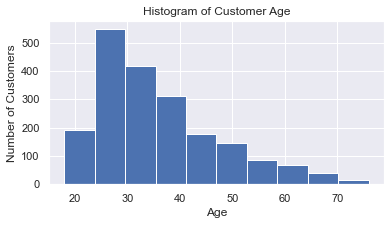

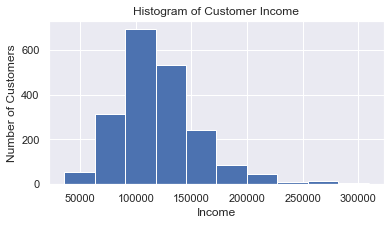

In [6]:
x = df_customers.iloc[:, 2].values.reshape(-1, 1)
y = df_customers.iloc[:, 4].values.reshape(-1, 1)
plt.figure(figsize=(6, 3))
plt.hist(x)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Histogram of Customer Age')

plt.figure(figsize=(6, 3))
plt.hist(y)
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Histogram of Customer Income')

## 2.2. Inferential Statistics

### 2.2.1. Correlation heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

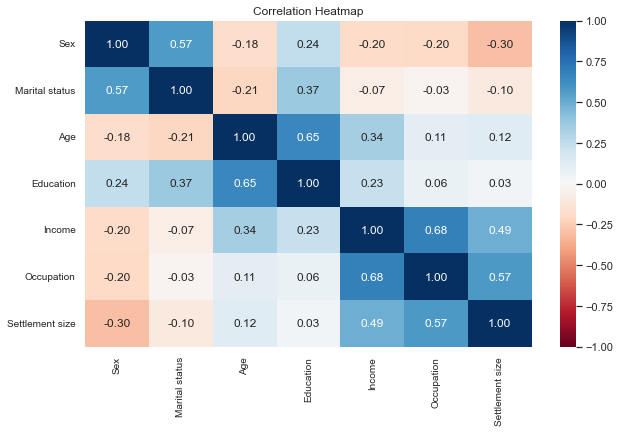

In [7]:
plt.figure(figsize=(10, 6))
s=sns.heatmap(df_customers.corr(), 
             annot=True, 
             cmap='RdBu', 
             vmin=-1,
             vmax=1,
             fmt=".2f") #The range for the pearson correlation is -1 to 1
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=10)
plt.title("Correlation Heatmap")
plt.show

Results:
- The bluer the square etween variables, the higher the positive correlation between them. The reder the square, the higher the negative correlation
* Age and education are correlated: older people are more highly educated
* Income and occupation are correlated: The higher the position, the better the income
* Settlement size and occupation are correlated: The higher the position the better the the settlment size
* Settlement size and income are correlated: The higher the income the better the the settlment size


### 2.2.2. Scatter plot visualizations for correlations

Age against Income

In [8]:
x = df_customers.iloc[:, 2].values.reshape(-1, 1)
y = df_customers.iloc[:, 4].values.reshape(-1, 1)

linear_model = LinearRegression().fit(x, y)
y_pred = linear_model.predict(x)
r_sq = linear_model.score(x, y)
intercept = linear_model.intercept_
slope = linear_model.coef_
print('intercept:', intercept)
print('slope:', slope)
print('coefficient of determination:', r_sq)

intercept: [81182.09171279]
slope: [[1107.58660189]]
coefficient of determination: 0.11601528363735947


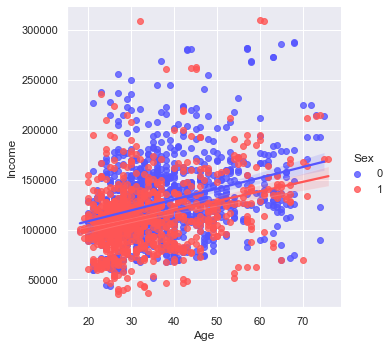

In [9]:
g = sns.lmplot(
    data=df_customers,
    x="Age", y="Income", hue="Sex", palette='seismic',
    height=5
)
g.set_axis_labels("Age", "Income")

Results:
Not only the higher the age, the higher the income, but also, male seem to have higher income in general compared to female

- The mode age is between 20 and 30. More than 500 customers are young adults => Ensuring more products for this age of consumers is crucial
- More than 600 cutomers have a mode income between 100000 and 125000 => This should be conseidered when setting the pric


## 2.3. Cluster Analysis

### 2.3.1. Standardizing the data

All features should have equal weight, to eleminate any possible bias.

In [10]:
scaler=StandardScaler()
customers_std=scaler.fit_transform(df_customers)

### 2.3.2. Hierarchical Clustering 
The goal is to identify if there segments that are similar to each otherHierarchical custering to observe the clusters

The aim of the dendrogram is to observe the clusters

<function matplotlib.pyplot.show(close=None, block=None)>

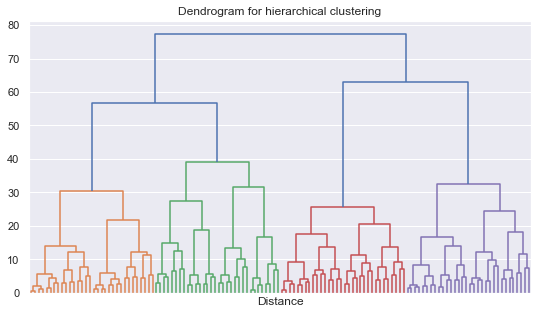

In [11]:
clust=linkage(customers_std, method='ward') 

plt.figure(figsize=(9, 5))
plt.xlabel('Observations')
plt.xlabel('Distance')
plt.title('Dendrogram for hierarchical clustering')
dendrogram(clust, truncate_mode='level', p=6, show_leaf_counts=True, no_labels=True)
plt.show

Result: The dendrogram shows four clusters (if we cut it off at 40%)

### 2.3.3. K-Means Clustering

Four clusters as that's what was recommended by the dendrogram

In [12]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customers_std)

KMeans(n_clusters=4, random_state=42)

In [13]:
df_kmeans=df_customers.copy()
df_kmeans['Segment K-means']=kmeans.labels_
df_analysis=df_kmeans.groupby(['Segment K-means']).mean()
df_analysis['Number of Obs']=df_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
df_analysis['Proportion of Obs']=df_analysis['Number of Obs']/df_analysis['Number of Obs'].sum()
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Obs,Proportion of Obs
Segment K-means,,,,,,,,,
0,0.50,0.69,55.70,2.13,158338.42,1.13,1.11,263,0.13
1,0.35,0.02,35.58,0.75,97859.85,0.33,0.04,462,0.23
2,0.85,1.00,28.96,1.07,105759.12,0.63,0.42,705,0.35
3,0.03,0.17,35.64,0.73,141218.25,1.27,1.52,570,0.28


In [14]:
df_analysis.rename({0:'The Successful People', 1:'The Less Fortunate', 2:'The Housewives', 3:'The Career Driven'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Obs,Proportion of Obs
Segment K-means,,,,,,,,,
The Successful People,0.50,0.69,55.70,2.13,158338.42,1.13,1.11,263,0.13
The Less Fortunate,0.35,0.02,35.58,0.75,97859.85,0.33,0.04,462,0.23
The Housewives,0.85,1.00,28.96,1.07,105759.12,0.63,0.42,705,0.35
The Career Driven,0.03,0.17,35.64,0.73,141218.25,1.27,1.52,570,0.28


#### Scatter plot for vizualizing the clusters

C:\Users\noure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


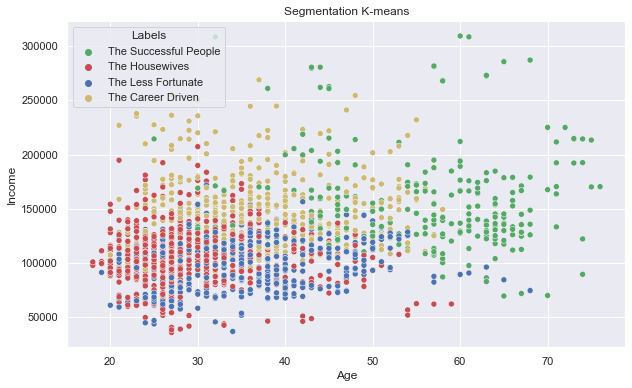

In [15]:
df_kmeans['Labels']=df_kmeans['Segment K-means'].map({0:'The Successful People', 1:'The Less Fortunate', 2:'The Housewives', 3:'The Career Driven'})
x_axis=df_kmeans['Age']
y_axis=df_kmeans['Income']
plt.figure(figsize=(10, 6))
sns.scatterplot(x_axis, y_axis, hue=df_kmeans['Labels'], palette=['g', 'r', 'b', 'y'] )
plt.title('Segmentation K-means')
plt.show()

Results: The green segment (The Successful People) is separated as it is the highest in both age and income. However, the other three segments are grouped together, which makes to get visual insights following this clustering method.

## 2.4. Principal Components Analysis

In [16]:
pca=PCA()
pca.fit(customers_std)

PCA()

#### Creating 7 components that sum up all tha variables of the data

In [17]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

### 2.4.1. The cumulative explained variance

Text(0, 0.5, 'Cumulative Explained Variance')

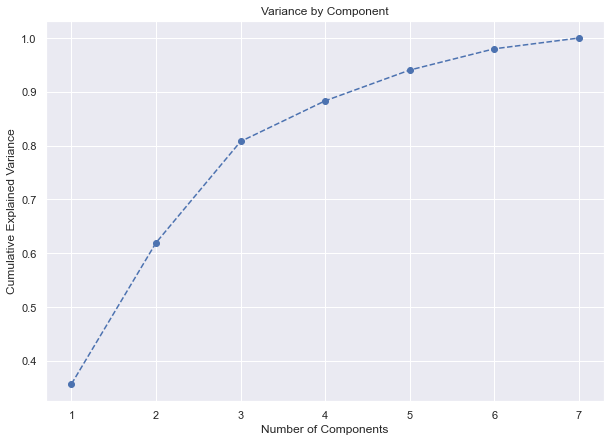

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ='o',linestyle='--')

plt.title('Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

- Useful to determine how many components to keep
- As a rule of thumb, 70% to 80% of the variance needs to be kept
- In this case 3 components seem to be enough to explain 80% of the variance

### 2.4.2. Creating the three components

In [19]:
pca=PCA(n_components=3)
pca.fit(customers_std)

PCA(n_components=3)

In [20]:
pca_comp=pd.DataFrame(data=pca.components_,
                        columns=df_customers.columns.values, 
                        index=['C1', 'C2', 'C3'])
pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C1,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
C2,0.46,0.51,0.31,0.64,0.12,0.01,-0.07
C3,-0.29,-0.44,0.61,0.28,-0.17,-0.40,-0.30


- C1: Financial Situation focused variables as it is highly positively correlated with income, occupation,and settlment size, and there is a medium + correlation with age
- C2: Education and partnership focused variables as it is highly correlated with education, and martial status
- C3: Experience focused variables as it is negatively correlated with martial status, and highly correlated with age

In [21]:
scores=pca.transform(customers_std)
scores

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

### 2.4.3. PCA with K-means Clusterig

<function matplotlib.pyplot.show(close=None, block=None)>

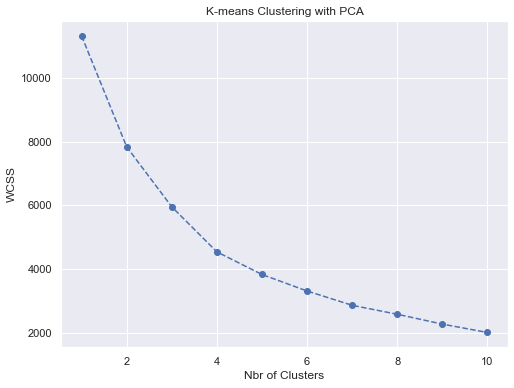

In [22]:
#Components will be used as features for Kmeans clustering
wcss=[]
for i in range(1,11):
    pca_kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    pca_kmeans.fit(scores)
    wcss.append(pca_kmeans.inertia_)

#Checking the number of clusters with the Elbow method
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Nbr of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show

The results confirms that the number of clusters is 4

In [23]:
pca_kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_kmeans.fit(scores)

KMeans(n_clusters=4, random_state=42)

In [24]:
res1=pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(scores) ], axis=1)
res1.columns.values[-3:]=['C1:Financial Situation', 'C2:Education & Partnership', 'C3:Experience']
res1['Segment K-means PCA']=pca_kmeans.labels_

#### The mean values of each component by segment

In [25]:
res2=res1.groupby(['Segment K-means PCA']).mean()
res2.columns.values[-3:]=['C1: Financial Situation', 'C2:Education & Partnership', 'C3:Experience']
res2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,C1: Financial Situation,C2:Education & Partnership,C3:Experience
Segment K-means PCA,,,,,,,,,,
0,0.90,0.97,28.88,1.06,107551.50,0.68,0.44,-1.11,0.70,-0.78
1,0.03,0.17,35.74,0.73,141525.83,1.27,1.48,1.37,-1.05,-0.25
2,0.31,0.10,35.31,0.76,93692.57,0.25,0.04,-1.05,-0.90,1.00
3,0.51,0.69,55.68,2.13,158019.10,1.12,1.10,1.69,2.03,0.84


The results showcase that:
- Segment0: Low values on C1 and C3, and medium to high value on C2=> The House Wives segment
- Segment2: High values on C1 and low on C2, and C3=> The career driven segment
- Segment3: Low on C1 and C2, and high on C3=> The less fortunate segment
- Segment4: High on all components=> The Successful People segment

In [26]:
res2['Number of Obs']=res1[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
res2['Proportion of Obs']=res2['Number of Obs']/res2['Number of Obs'].sum()
res2=res2.rename({0:'The Housewives ',
                1: 'The Career Driven',
                2: 'The Less Fortunate',
                3: 'The Successful People'})
res2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,C1: Financial Situation,C2:Education & Partnership,C3:Experience,Number of Obs,Proportion of Obs
Segment K-means PCA,,,,,,,,,,,,
The Housewives,0.90,0.97,28.88,1.06,107551.50,0.68,0.44,-1.11,0.70,-0.78,692,0.35
The Career Driven,0.03,0.17,35.74,0.73,141525.83,1.27,1.48,1.37,-1.05,-0.25,583,0.29
The Less Fortunate,0.31,0.10,35.31,0.76,93692.57,0.25,0.04,-1.05,-0.90,1.00,460,0.23
The Successful People,0.51,0.69,55.68,2.13,158019.10,1.12,1.10,1.69,2.03,0.84,265,0.13


Results:
- The largest segment with 692 individuals is the The House Wives segment. 
- It is followed by the career driven segmentgroup with 583 person (29%)
- The less fortunate segment has 460 person
- The smallest segment is The Successful People well with 265 person (13%)

#### Scatter Plot for K-means with PCA clusters

For the visualizations, I chose two components to use them as axis for the visualizations. 
Given that the first two segments explain more variance than the 3rd one, they are the ones that will be used.

C:\Users\noure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


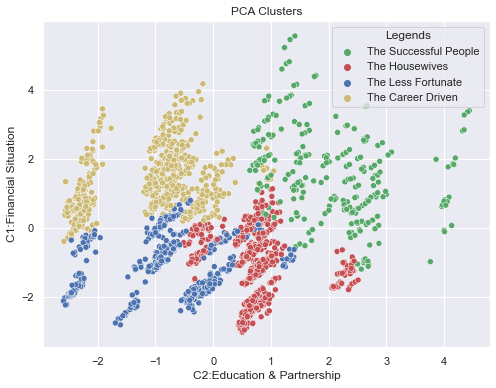

In [27]:
res1['Legends']=res1['Segment K-means PCA'].map({0:'The Housewives',
                1: 'The Career Driven',
                2: 'The Less Fortunate',
                3: 'The Successful People'})
x_axis=res1['C2:Education & Partnership']
y_axis=res1['C1:Financial Situation']
plt.figure(figsize=(8, 6))
sns.scatterplot(x_axis, y_axis, hue=res1['Legends'], palette=['g', 'r', 'b', 'y'])
plt.title('PCA Clusters')
plt.show()

- The division based on the PCA is easier to distinguish compared to the one that was only done by Kmeans clustering
- The clusters are orthogonal to each other which means that the difference between components is as big as possible

# 3. Purchase Analysis for Targeting and Positioning

#### Data Preprocessing

Standardizing the purchase data the same way as the customer data

In [28]:
f = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
purchase_customers_std = scaler.transform(f)

#### Applying PCA and K-means

Obtaining 3 principal components for each row. 

In [29]:
purchase_customers_std_pca = pca.transform(purchase_customers_std)

Adding Segment information into the purchase data frame:

In [30]:
purchase_customers_std_pca_kmeans =pca_kmeans.predict(purchase_customers_std_pca)

df_purchase2=df_purchase.copy()
df_purchase2['Segment'] = purchase_customers_std_pca_kmeans #Identifies which cluster each observation belongs to.

## 3.1 Descriptive Statistics for Segments

### 3.1.1. Discovering the Data

In [31]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

#### Checking the number of visits and number of purchases by customer

In [32]:
v = df_purchase2[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
v = v.set_index('ID')
v = v.rename(columns = {'Incidence': '#Visits'})

p = df_purchase2[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
p = p.set_index('ID')
p = p.rename(columns = {'Incidence': '#Purchases'})

res = v.join(p)

s=df_purchase2[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
s = s.set_index('ID')
result = s.join(res)

result.head()

,Segment,#Visits,#Purchases
ID,,,
200000001,2.00,101,9
200000002,3.00,87,11
200000003,2.00,97,10
200000004,2.00,85,11
200000005,1.00,111,13


### 3.1.2 Calculation of the proportion of each segment 

Text(0.5, 1.0, 'Proportions of Segments')

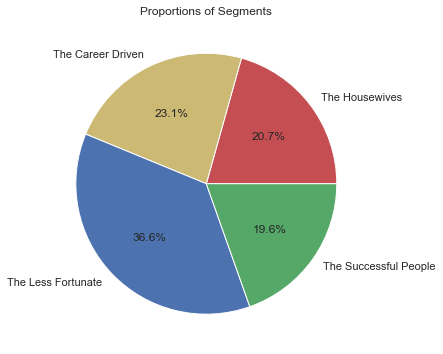

In [33]:
#Proportion of each segment calculation
prop = df_purchase2[['ID', 'Segment']].groupby(['Segment']).count() / df_purchase2.shape[0]
prop = prop.rename(columns = {'ID': 'Proportions of Segments'})

plt.figure(figsize = (8, 6))
plt.pie(prop['Proportions of Segments'],
        labels = ['The Housewives',
                'The Career Driven',
                'The Less Fortunate',
                'The Successful People'],
        autopct = '%1.1f%%', #To show the percentages
        colors = ('r', 'y', 'b', 'g'))
plt.title('Proportions of Segments')

### 3.1.3. Brand Analysis By Segment

#### Filtering the data to get only the times when a purchase was made

In [34]:
df_purchase_made = df_purchase2[df_purchase2['Incidence'] == 1]

#Creating dummy variables for the brands
bd = pd.get_dummies(df_purchase_made['Brand'], prefix = 'Brand', prefix_sep = '_')
bd['Segment'], bd['ID'] = df_purchase_made['Segment'], df_purchase_made['ID']

#### Vizualizing purchases by brand and segment

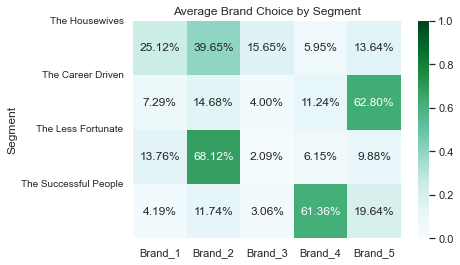

In [35]:
x = bd.groupby(['ID'], as_index = True).mean()
mean_brand_choice = x.groupby(['Segment'], as_index = True).mean()

sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap='BuGn',
            annot = True, 
            fmt=".2%")
plt.yticks([0, 1, 2, 3], ['The Housewives',
                'The Career Driven',
                'The Less Fortunate',
                'The Successful People'], rotation = 360, fontsize = 10)
plt.title('Average Brand Choice by Segment')
plt.show()

- Housewives don't have strong preference towards one specific brand, but they have an average preference toward brand 2 then 1
=>They could be encouraged to try different brands

- Career Driven have a tendency to buy more of brand 5( wich is the most expensive)
=>These are attracted by fancy expensive brands. Can be considered as an incentive to rise the price for this brand

- The Less Fortunate segment have a strong preference towards brand 2 witch is the 2nd cheapest brand
=>Even though theyare the less fortunate, it seems that the price is not their most important criteria when choosing their brand

- The Successful People tend to buy more of brand 4



#### Checking Revenue by Segments

In [36]:
# Computing the revenue for each brand

b1 = df_purchase2[df_purchase2['Brand'] == 1]
b2 = df_purchase2[df_purchase2['Brand'] == 2]
b3 = df_purchase2[df_purchase2['Brand'] == 3]
b4 = df_purchase2[df_purchase2['Brand'] == 4]
b5 = df_purchase2[df_purchase2['Brand'] == 5]

b1.loc[:, 'Revenue Brand 1'] = b1['Price_1'] * b1['Quantity']
b2.loc[:, 'Revenue Brand 2'] = b2['Price_2'] * b2['Quantity']
b3.loc[:,'Revenue Brand 3'] = b3['Price_3']*b3['Quantity']
b4.loc[:,'Revenue Brand 4'] = b4['Price_4']*b4['Quantity']
b5.loc[:,'Revenue Brand 5'] = b5['Price_5']*b5['Quantity']

df_RevenueBySegment= pd.DataFrame() #Segment is key
df_RevenueBySegment[['Segment', 'Revenue Brand 1']] = b1[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
df_RevenueBySegment[['Segment', 'Revenue Brand 2']] = b2[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()
df_RevenueBySegment[['Segment','Revenue Brand 3']] = b3[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()
df_RevenueBySegment[['Segment','Revenue Brand 4']] = b4[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()
df_RevenueBySegment[['Segment','Revenue Brand 5']] = b5[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

#Computing the total revenue

df_RevenueBySegment['Total Revenue'] = (df_RevenueBySegment['Revenue Brand 1'] +
                                           df_RevenueBySegment['Revenue Brand 2'] +
                                           df_RevenueBySegment['Revenue Brand 3'] +
                                           df_RevenueBySegment['Revenue Brand 4'] +
                                           df_RevenueBySegment['Revenue Brand 5'] )

#Computing the revenue proportion from each segment

df_RevenueBySegment['Proportions of Segments'] = prop['Proportions of Segments']
df_RevenueBySegment['Segment'] = df_RevenueBySegment['Segment'].map({0:'The Housewives',
                                                                    1:'The Career Driven',
                                                                    2:'The Less Fortunate',
                                                                    3:'The Successful People'})
df_RevenueBySegment = df_RevenueBySegment.set_index(['Segment'])


df_RevenueBySegment

C:\Users\noure\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Proportions of Segments
Segment,,,,,,,
The Housewives,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.21
The Career Driven,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.23
The Less Fortunate,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.37
The Successful People,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.20


Results: Segments interpretations***

- The Career Driven segment brings the most revenue to the store, 
- they are followed by the Successful People segment, 
- then the Less Fortunate people,
- then The Housewives.

Notes: Career Driven segment was buying the most expensive brand.
- The Housewives segment has almost the same size as the Career driven, but it brings less than half teir revenue.
- The the Successful and the less fortunate people segments spend around the same amount of money even though the latter is twice the size of the former.

Results: Brands Interpretations

- Brand three has the lowest revenue, given that it is the middle brand in terms of price, and the segment that consumes it the most is The Housewives.
- Brand four, has a high percentage of Successful segment customers compared to the other brands.
- The few Successful segment customers who did not buy brand 4, bought an even more expensive one which is brand 5. 
- The Successful segment seem loyal to their brand of choice (possibility of raising the price)



## 3.2. Modeling Elasticities for Purchase Incidence

### 3.2.1. Preparing the data frame

In [37]:
df_predict = df_purchase.copy()

In [38]:
df_predict['Segment'] = purchase_customers_std_pca_kmeans

In [39]:
segment_dummies = pd.get_dummies(purchase_customers_std_pca_kmeans, prefix = 'Segment', prefix_sep = '_')
df_predict = pd.concat([df_predict, segment_dummies], axis = 1)
df_incidence = df_predict

### 3.2.2. Building the Model

#### Defining dependent and independent variables
- Dependent variable is the purchase incidence
- Independent variables are the prices because we are interested in the influence of the price on the purchase incidence
- The mean price will be aken in consideration as it is the most relevant and most representative


In [40]:
 Y= df_incidence['Incidence']

X=pd.DataFrame()
X['Average Price']=(df_incidence['Price_1'] +
                   df_incidence['Price_2'] +
                   df_incidence['Price_3'] +
                   df_incidence['Price_4'] +
                   df_incidence['Price_5'] ) / 5

#### Logisitic regression model


In [41]:
log_model = LogisticRegression(solver = 'sag') #The solver, is useful for optimization problems in logistic regression.
                                            #'sag' is optimal for simple problems with large datasets.
log_model.fit(X, Y)

log_model.coef_

array([[-2.34930089]])

Results: Price increase will lead to purchase probability decrease since the coef is negative.

### 3.2.3. Price elasticities for the average consumer

#### Checking the prices for the different brands

In [42]:
df_incidence[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.00,58693.00,58693.00,58693.00,58693.00
mean,1.39,1.78,2.01,2.16,2.65
std,0.09,0.17,0.05,0.09,0.10
min,1.10,1.26,1.87,1.76,2.11
25%,1.34,1.58,1.97,2.12,2.63
50%,1.39,1.88,2.01,2.17,2.67
75%,1.47,1.89,2.06,2.24,2.70
max,1.59,1.90,2.14,2.26,2.80


- Defining the price range for the price elasticity model.
- The range is between 0.5 and 3.49, given that the min price in the current dataset is 1.1 and the maximum is 2.8. 
- The price range was chosen as an extension to the current one. 

In [43]:
prange = np.arange(0.5, 3.5, 0.01)

#### Predicting the purchase probability for the new price range. 

In [44]:
df_prange = pd.DataFrame(prange)

Y_pr = log_model.predict_proba(df_prange)

purchase_pr = Y_pr[:][:, 1]
pe = log_model.coef_[:, 0] * prange * (1 - purchase_pr)

#Y_pr

Results:
- The result is a 2x300  array, 
- with the first column being the probability for not purchasing, 
- and the second the probability for purchase for each price point in the new range.

- Only the second part which is the purchase probability will be taken into consideration

#### Price Elasticity Data Frame
The dataframe contains all the elasticities.

In [45]:
df_price_elasticity = pd.DataFrame(prange)

df_price_elasticity = df_price_elasticity.rename(columns = {0: "Price Point"})
df_price_elasticity['Mean Price Elasticity'] = pe

#Displaying everything in case I need to refer to a specific row
pd.options.display.max_rows = None
df_price_elasticity

,Price Point,Mean Price Elasticity
0,0.50,-0.10
1,0.51,-0.10
2,0.52,-0.10
3,0.53,-0.11
4,0.54,-0.11
5,0.55,-0.12
6,0.56,-0.12
7,0.57,-0.13
8,0.58,-0.13
9,0.59,-0.14


Results: The price elasticities are all negative. 
It is possible to identify where the customer becomes inelastic.

#### Elasticity Curve For Purchase Probability

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

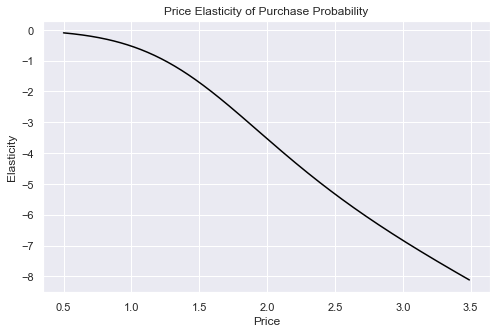

In [46]:
plt.figure(figsize = (8, 5))
plt.plot(prange, pe, color = 'Black')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

- The higher the price the less likely it is for the product to be purchased.
- The decrease in the purchase probability is slow for a price between 0.5 and 1.24 then it becomes steeper (exact value from the previous df).

- For price point 1.24: For each increase in price by 1% in price, the probability of purchase will change -0.984% (Inelastic, almost elastic)
- For price point 1.5: For each increase of 1% in price, there will be a decline of -1.7% of purchase probability. (Elastic)


Notes:
- If the elasticity is greater than 100% (absolute value greater then 1) then the purchase probability is elastic
- If elasticity is less than 100% (absolute values smaller than 1), it is inelastic.
- For inelastic values it is recommended to increase the price, and for elastic ones the better option is to decrease it.

Results:
- There should be an increase in price where elasticity is smaller than 1 (Price lower than 1.25) in absolute values and decrease is price where it is higher (Price higher than 1.25)


### 3.2.4. Purchase Probability by Segment

##### Segment 0: The Housewives

In [47]:
#Filtering the data to contain only customers from segment 0.
df_incidence_seg0 = df_incidence[df_incidence['Segment'] == 0]

Y = df_incidence_seg0['Incidence']
X = pd.DataFrame()

#Calculating the average price
X['Average Price'] = (df_incidence_seg0 ['Price_1'] + 
                  df_incidence_seg0 ['Price_2'] + 
                  df_incidence_seg0 ['Price_3'] + 
                  df_incidence_seg0 ['Price_4'] + 
                   df_incidence_seg0 ['Price_5']) / 5

#Logistic Regression Model
log_model_seg0 = LogisticRegression(solver = 'sag')
log_model_seg0.fit(X, Y)

#Checking the coefficient
log_model_seg0.coef_

array([[-1.50799115]])

In [48]:
#Calculating Price Elasticities 
Y_seg0 = log_model_seg0.predict_proba(df_prange)
purchase_pr_seg0 = Y_seg0[:][:, 1]
pe_seg0 = log_model_seg0.coef_[:, 0] * prange * (1 - purchase_pr_seg0)

##### Segment 1: Career Driven

In [49]:
#Filtering the data to contain only customers from segment 1.
df_incidence_seg1 = df_incidence[df_incidence['Segment'] == 1]

Y = df_incidence_seg1['Incidence']
X = pd.DataFrame()

#Calculating the average price
X['Average Price'] = (df_incidence_seg1 ['Price_1'] + 
                  df_incidence_seg1 ['Price_2'] + 
                  df_incidence_seg1 ['Price_3'] + 
                  df_incidence_seg1 ['Price_4'] + 
                   df_incidence_seg1 ['Price_5']) / 5

#Logistic Regression Model
log_model_seg1 = LogisticRegression(solver = 'sag')
log_model_seg1.fit(X, Y)

#Checking the coefficient
log_model_seg1.coef_

array([[-1.71203615]])

In [50]:
#Calculating Price Elasticities 
Y_seg1 = log_model_seg1.predict_proba(df_prange)
purchase_pr_seg1 = Y_seg1[:][:, 1]
pe_seg1 = log_model_seg1.coef_[:, 0] * prange * (1 - purchase_pr_seg1)

##### Segment 2: Less Fortunate

In [51]:
#Filtering the data to contain only customers from segment 2.
df_incidence_seg2 = df_incidence[df_incidence['Segment'] == 2]

Y = df_incidence_seg2['Incidence']
X = pd.DataFrame()

#Calculating the average price
X['Average Price'] = (df_incidence_seg2 ['Price_1'] + 
                  df_incidence_seg2 ['Price_2'] + 
                  df_incidence_seg2 ['Price_3'] + 
                  df_incidence_seg2 ['Price_4'] + 
                   df_incidence_seg2 ['Price_5']) / 5

#Logistic Regression Model
log_model_seg2 = LogisticRegression(solver = 'sag')
log_model_seg2.fit(X, Y)

#Checking the coefficient
log_model_seg2.coef_

array([[-3.63921314]])

In [52]:
#Calculating Price Elasticities 
Y_seg2 = log_model_seg2.predict_proba(df_prange)
purchase_pr_seg2 = Y_seg2[:][:, 1]
pe_seg2 = log_model_seg2.coef_[:, 0] * prange * (1 - purchase_pr_seg2)

##### Segment 3: The Successful People

In [53]:
#Filtering the data to contain only customers from segment 3.
df_incidence_seg3 = df_incidence[df_incidence['Segment'] == 3]

Y = df_incidence_seg3['Incidence']
X = pd.DataFrame()

#Calculating the average price
X['Average Price'] = (df_incidence_seg3 ['Price_1'] + 
                  df_incidence_seg3 ['Price_2'] + 
                  df_incidence_seg3 ['Price_3'] + 
                  df_incidence_seg3 ['Price_4'] + 
                   df_incidence_seg3 ['Price_5']) / 5

#Logistic Regression Model
log_model_seg3 = LogisticRegression(solver = 'sag')
log_model_seg3.fit(X, Y)

#Checking the coefficient
log_model_seg3.coef_

array([[-1.24565165]])

In [54]:
#Calculating Price Elasticities 
Y_seg3 = log_model_seg3.predict_proba(df_prange)
purchase_pr_seg3 = Y_seg3[:][:, 1]
pe_seg3 = log_model_seg3.coef_[:, 0] * prange * (1 - purchase_pr_seg3)

#### Vizualizing the results of elasticities by segment

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

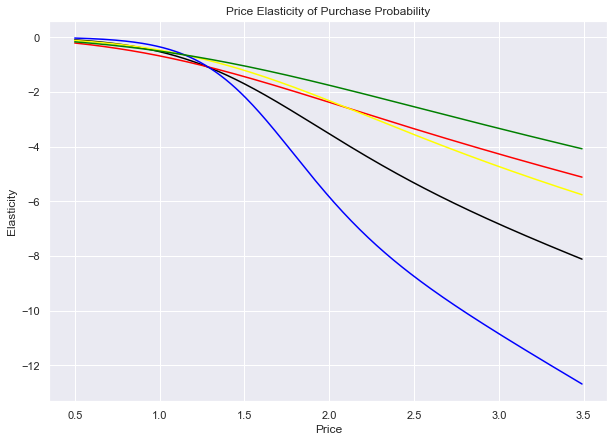

In [55]:
plt.figure(figsize = (10, 7))
plt.plot(prange, pe, color = 'black')
plt.plot(prange, pe_seg0, color = 'red')
plt.plot(prange, pe_seg1, color = 'yellow')
plt.plot(prange, pe_seg2, color = 'blue')
plt.plot(prange, pe_seg3, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Results:
- The Successful People segment 3 are the least elastic when compared to the rest: their purchase probability does not get affected much by price.

- The House Wives segment 0 is more elastic at the beginning than segment1 Career Driven, but then shift to being less elastic than it.
- This could be explained by the fact that this segment is the least homogenous according to the preious descriptive analystics.
- This means that customers in this segment have different shopping habits.

- The sgement2 the less fortunate, starts by being the least elastic and ends up becoming the most elastic of all segments.
- This segment is more inelastic at lower prices
- This could be explained by the fact that this segment is the biggest one. 

- For segment1 Career Driven, the price elasticity is lower than average

### 3.2.5. Price Elasticity with Promotions

#### Data Preparation

In [56]:
Y = df_incidence['Incidence']

X = pd.DataFrame()
X['Average Price'] = (df_incidence['Price_1'] + 
                   df_incidence['Price_2'] + 
                   df_incidence['Price_3'] + 
                   df_incidence['Price_4'] + 
                   df_incidence['Price_5']) / 5

#Including the promotion feature, and calculate the average promotion rate across the five brands.
X['Average Promotion'] = (df_incidence['Promotion_1'] +
                       df_incidence['Promotion_2'] +
                       df_incidence['Promotion_3'] +
                       df_incidence['Promotion_4'] +
                       df_incidence['Promotion_5'] ) / 5

#### Building the Model

In [57]:
log_model_promotion = LogisticRegression(solver = 'sag')
log_model_promotion.fit(X, Y)
log_model_promotion.coef_

array([[-1.49401276,  0.56161112]])

Results:
- The coefficient for promotion is positive. 
- There is a positive relationship between promotion and purchase probability.

#### Price Elasticity when there are Promotions

In [58]:
#Including the price range as the price feature.
df_price_elasticity_promotion = pd.DataFrame(prange)

#Including the promotion feature.
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

#Filtering for when there is a promotion
df_price_elasticity_promotion['Promotion'] = 1 


Y_promotion = log_model_promotion.predict_proba(df_price_elasticity_promotion)
promo = Y_promotion[:, 1]
price_elasticity_promo = (log_model_promotion.coef_[:, 0] * prange) * (1 - promo)

#Probabilities of purchase and promotions
df_price_elasticity['PE. of Segment 0'] = pe_seg0
df_price_elasticity['PE. of Segment 1'] = pe_seg1
df_price_elasticity['PE. of Segment 2'] = pe_seg2
df_price_elasticity['PE. of Segment 3'] = pe_seg3

df_price_elasticity['Elasticity with Promotion'] = price_elasticity_promo

### 3.2.6. Price Elasticity Without Promotion

In [59]:
df_price_elasticity_NOTpromotion = pd.DataFrame(prange)
df_price_elasticity_NOTpromotion = df_price_elasticity_NOTpromotion.rename(columns = {0: "Price Range"})

df_price_elasticity_NOTpromotion['Promotion'] = 0
Y_no_promo = log_model_promotion.predict_proba(df_price_elasticity_NOTpromotion)
no_promo = Y_no_promo[: , 1]

price_elasticity_no_promo = log_model_promotion.coef_[:, 0] * prange *(1- no_promo)
df_price_elasticity['Elasticity With No Promotion'] = price_elasticity_no_promo
df_price_elasticity

,Price Point,Mean Price Elasticity,PE. of Segment 0,PE. of Segment 1,PE. of Segment 2,PE. of Segment 3,Elasticity with Promotion,Elasticity With No Promotion
0,0.50,-0.10,-0.21,-0.12,-0.03,-0.17,-0.13,-0.20
1,0.51,-0.10,-0.22,-0.12,-0.03,-0.17,-0.13,-0.20
2,0.52,-0.10,-0.22,-0.13,-0.03,-0.18,-0.13,-0.21
3,0.53,-0.11,-0.23,-0.13,-0.04,-0.18,-0.14,-0.21
4,0.54,-0.11,-0.24,-0.14,-0.04,-0.19,-0.14,-0.22
5,0.55,-0.12,-0.25,-0.14,-0.04,-0.19,-0.15,-0.23
6,0.56,-0.12,-0.25,-0.15,-0.04,-0.20,-0.15,-0.23
7,0.57,-0.13,-0.26,-0.15,-0.05,-0.20,-0.16,-0.24
8,0.58,-0.13,-0.27,-0.16,-0.05,-0.21,-0.16,-0.25
9,0.59,-0.14,-0.27,-0.16,-0.05,-0.21,-0.17,-0.25


#### Vizualizing Price Elasticities With and Without Promotions

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

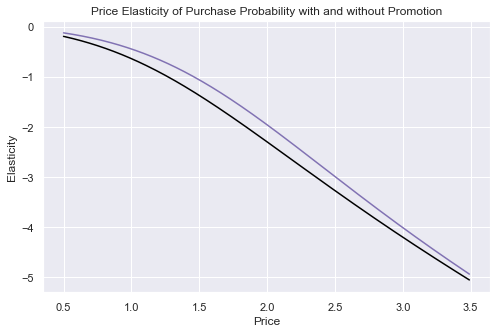

In [60]:
plt.figure(figsize = (8, 5))
plt.plot(prange, price_elasticity_no_promo, color="black")
plt.plot(prange, price_elasticity_promo, color="m")
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

Results:
- The purchase probability elasticity of customers is less elastic when there is promotion.
- People are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion.

- Taking into consideration the previous data frame: 
    * The inelasticity for no promotion ends at 1.26 while for promotion at 1.45.
    * Difference of 0.19
    * For a price 1.30 the purchase probability is elastic.
    * For a price of 1.50  on the regular a product is elastic. When its price is reduced to 1.3 during a promotion then 
    * it becomes inelastic.
    
Interpretations:
- People are more willing to buy products at promotional prices, because of the large discounts igns in stores. 
- Customers are less price sensitive to similar price changes when there are promotion activities.
- It pays off to offer discounts.
- According to this model, it would be more beneficial to have a higher original price and constant promotion 
- rather than a lower original price.


## 3.3. Brand Choice Analysis

### 3.3.1. Data Preparation

Filtering for when a purchase has happened.

In [61]:
brand = df_incidence[df_incidence['Incidence'] == 1]

### 3.3.2. Model Building

In [62]:
Y = brand['Brand']

#The prediction will be based on the prices for the five brands.
X = brand[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]

#Fitting the model
log_model_brand = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
log_model_brand.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

#### Vizualizing the coefficients in a dataframe 

In [63]:
brand_coef = pd.DataFrame(log_model_brand.coef_)
brand_coef = pd.DataFrame(np.transpose(log_model_brand.coef_))
coefficients = ['Brand1 Coef', 'Brand2 Coef', 'Brand3 Coef', 'Brand4 Coef', 'Brand5 Coef']
brand_coef.columns = [coefficients]
prices = ['Brand1 Price', 'Brand2 Price', 'Brand3 Price', 'Brand4 Price', 'Brand5 Price']
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)
brand_coef

,Brand1 Coef,Brand2 Coef,Brand3 Coef,Brand4 Coef,Brand5 Coef
Brand1 Price,-3.92,1.27,1.62,0.57,0.44
Brand2 Price,0.66,-1.88,0.56,0.40,0.26
Brand3 Price,2.42,-0.21,0.50,-1.40,-1.31
Brand4 Price,0.70,-0.21,1.04,-1.25,-0.29
Brand5 Price,-0.20,0.59,0.45,0.25,-1.09


Results:
- For brand 1 the coefficient for its own price is negative which makes sense because there should be a negative correlations between the choice for a brand and its price
- On the other hand the coefficient for brand 1 with respect to the other brands prices is positive except for brand 5
- The positive coefficient is reflected by the marketing mix. The higher the price of a certain brand, the higher the probability that people will switch to another brand


### 3.3.3. Elasticities by Brand 

#### Brand 1 Analysis

##### Own price elasticity for brand choice

In [64]:
df_own_brand_1 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_1['Price_1'] = prange
df_own_brand_1['Price_2'] = brand['Price_2'].mean()
df_own_brand_1['Price_3'] = brand['Price_3'].mean()
df_own_brand_1['Price_4'] = brand['Price_4'].mean()
df_own_brand_1['Price_5'] = brand['Price_5'].mean()
df_own_brand_1

,Price_1,Price_2,Price_3,Price_4,Price_5
0,0.50,1.76,2.01,2.16,2.65
1,0.51,1.76,2.01,2.16,2.65
2,0.52,1.76,2.01,2.16,2.65
3,0.53,1.76,2.01,2.16,2.65
4,0.54,1.76,2.01,2.16,2.65
5,0.55,1.76,2.01,2.16,2.65
6,0.56,1.76,2.01,2.16,2.65
7,0.57,1.76,2.01,2.16,2.65
8,0.58,1.76,2.01,2.16,2.65
9,0.59,1.76,2.01,2.16,2.65


###### Brand choice model prediction.

In [65]:
predict_brand_1 = log_model_brand.predict_proba(df_own_brand_1)

#Getting the 1st column located on position 0,
pr_own_brand_1 = predict_brand_1[: ][:, 0]

beta1 = brand_coef.iloc[0, 0]
beta1

-3.92

##### Calculating price elasticities for brand choice without promotion.

In [66]:
own_price_elasticity_brand_1 = beta1 * prange * (1 - pr_own_brand_1)

df_price_elasticity['Brand_1'] = own_price_elasticity_brand_1
pd.options.display.max_rows = 5
df_price_elasticity

,Price Point,Mean Price Elasticity,PE. of Segment 0,PE. of Segment 1,PE. of Segment 2,PE. of Segment 3,Elasticity with Promotion,Elasticity With No Promotion,Brand_1
0,0.50,-0.10,-0.21,-0.12,-0.03,-0.17,-0.13,-0.20,-0.29
1,0.51,-0.10,-0.22,-0.12,-0.03,-0.17,-0.13,-0.20,-0.31
...,...,...,...,...,...,...,...,...,...
298,3.48,-8.09,-5.10,-5.74,-12.65,-4.07,-4.92,-5.03,-13.64
299,3.49,-8.12,-5.12,-5.76,-12.69,-4.08,-4.93,-5.05,-13.68


###### Vizualizing elasticities of purchase probability for brand 1

Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 1')

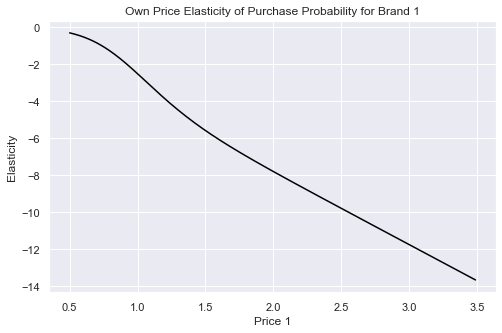

In [67]:
plt.figure(figsize = (8, 5))
plt.plot(prange, own_price_elasticity_brand_1, color = 'black')
plt.xlabel('Price 1')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 1')

#### Brand 2 Analysis

###### Own price elasticity for brand choice

In [68]:
df_own_brand_2 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_2['Price_1'] = brand['Price_1'].mean()
df_own_brand_2['Price_2'] = prange
df_own_brand_2['Price_3'] = brand['Price_3'].mean()
df_own_brand_2['Price_4'] = brand['Price_4'].mean()
df_own_brand_2['Price_5'] = brand['Price_5'].mean()

##### Brand choice model prediction

In [69]:
predict_brand_2 = log_model_brand.predict_proba(df_own_brand_2)

#Getting the 2nd column located on position 1,
pr_own_brand_2 = predict_brand_2[: ][:, 1]

beta2 = brand_coef.iloc[1, 1]
beta2

-1.88

##### Calculating price elasticities for brand choice without promotion

In [70]:
own_price_elasticity_brand_2 = beta2 * prange * (1 - pr_own_brand_2)

df_price_elasticity['Brand_2'] = own_price_elasticity_brand_2
pd.options.display.max_rows = None

#### Brand 3 Analysis

##### Own Price Elasticity for brand choice

In [71]:
df_own_brand_3 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_3['Price_1'] = brand['Price_1'].mean()
df_own_brand_3['Price_2'] = brand['Price_2'].mean()
df_own_brand_3['Price_3'] = prange
df_own_brand_3['Price_4'] = brand['Price_4'].mean()
df_own_brand_3['Price_5'] = brand['Price_5'].mean()

#Brand Choice Model prediction.
predict_brand_3 = log_model_brand.predict_proba(df_own_brand_3)

#Getting the 3rd column located on position 2,
pr_own_brand_3 = predict_brand_3[: ][:, 2]

beta3 = brand_coef.iloc[2, 2]

#Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_3 = beta3 * prange * (1 - pr_own_brand_3)

df_price_elasticity['Brand_3'] = own_price_elasticity_brand_3
pd.options.display.max_rows = None

#### Brand 4 Analysis

##### Own price elasticity for brand choice

In [72]:
df_own_brand_4 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_4['Price_1'] = brand['Price_1'].mean()
df_own_brand_4['Price_2'] = brand['Price_2'].mean()
df_own_brand_4['Price_3'] = brand['Price_3'].mean()
df_own_brand_4['Price_4'] = prange
df_own_brand_4['Price_5'] = brand['Price_5'].mean()

#Brand Choice Model prediction.
predict_brand_4 = log_model_brand.predict_proba(df_own_brand_4)

#Getting the 3rd column located on position 3,
pr_own_brand_4 = predict_brand_4[: ][:, 3]

beta4 = brand_coef.iloc[3, 3]

#Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_4 = beta4 * prange * (1 - pr_own_brand_4)

df_price_elasticity['Brand_4'] = own_price_elasticity_brand_4
pd.options.display.max_rows = None

#### Brand 5 Analysis

##### Own price elasticity for brand choice

In [73]:
df_own_brand_5 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_5['Price_1'] = brand['Price_1'].mean()
df_own_brand_5['Price_2'] = brand['Price_2'].mean()
df_own_brand_5['Price_3'] = brand['Price_3'].mean()
df_own_brand_5['Price_4'] = brand['Price_4'].mean()
df_own_brand_5['Price_5'] = prange

#Brand Choice Model prediction.
predict_brand_5 = log_model_brand.predict_proba(df_own_brand_5)

#Getting the 4th column located on position 4,
pr_own_brand_5 = predict_brand_5[: ][:, 4]

beta5 = brand_coef.iloc[4, 4]
#Check formula of elasticty for Beta

#Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * prange * (1 - pr_own_brand_5)

df_price_elasticity['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None

### 3.3.4. Cross Brand Elasticity for Brands 5 and 4

Chose those two because they are the most expensive thus the highest quality

In [74]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(prange.size))
df_brand5_cross_brand4 =df_own_brand_4
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.38,1.76,2.01,0.50,2.65
1,1.38,1.76,2.01,0.51,2.65
2,1.38,1.76,2.01,0.52,2.65
3,1.38,1.76,2.01,0.53,2.65
4,1.38,1.76,2.01,0.54,2.65


In [75]:
predict_brand5_cross_brand4 = log_model_brand.predict_proba(df_brand5_cross_brand4)
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

#Cross price elasticity formula used here
brand5_cross_brand4_price_elasticity = -beta5 * prange * pr_brand_4

df_price_elasticity['Brand 5 Cross Brand 4'] = brand5_cross_brand4_price_elasticity

#### Vizualizing the Cross Price Elasticities

Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 according the Brand 4 Price')

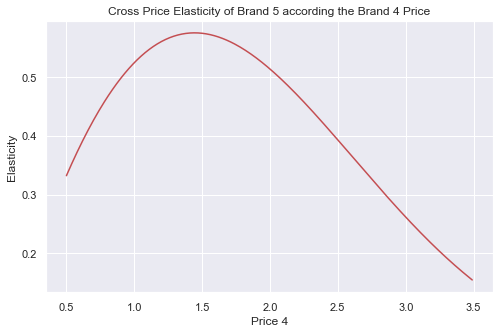

In [76]:
plt.figure(figsize = (8, 5))
plt.plot(prange, brand5_cross_brand4_price_elasticity, color = 'r')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 according the Brand 4 Price')

Results:
- If brand 4 price increases, the purchase probability for brand5 increases
Notes:
    - if E(Cross brand)>0 : The brands are substitues
    - if E(Cross brand)<0 : The brands are not sustitues
    - if |E(Cross brand)|>|E(own brand)|: Strong substitute
    
- Brand 4 is a strong substitue for brand 5 for all prices up to 1.65
- =>Brand 5 can create a strategy to target customers who choose brand 4 and attract them
 

### 3.3.5. Cross Price Elasticity by Segment

Based on previous analysis Brand4 is mostly consumed by The Successful People segment (Segment 3)

#### Segment 3: The Successful People

In [77]:
brand_seg3 = df_incidence[df_incidence['Incidence'] == 1]
brand_seg3 = brand_seg3[brand_seg3['Segment'] == 3]

In [78]:
#Building the model.
Y = brand_seg3['Brand']
brand_seg3 = pd.get_dummies(brand_seg3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_seg3[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
log_model_brand_seg3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
log_model_brand_seg3 .fit(X, Y)

#Coefficients table for segment 3
brand_coef = pd.DataFrame(np.transpose(log_model_brand_seg3.coef_))
brand_coef.columns = [coefficients]
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)
brand_coef

,Brand1 Coef,Brand2 Coef,Brand3 Coef,Brand4 Coef,Brand5 Coef
Brand1 Price,-2.15,1.33,0.82,0.12,-0.11
Brand2 Price,-0.96,-1.38,1.29,0.78,0.27
Brand3 Price,2.01,-1.65,-0.49,0.03,0.11
Brand4 Price,2.52,0.96,-0.25,-1.90,-1.33
Brand5 Price,-0.99,-0.30,1.17,0.56,-0.44


##### Own Brand Price Elasticity

In [79]:
df_own_brand_5_seg3 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_5_seg3['Price_1'] = brand_seg3['Price_1'].mean()
df_own_brand_5_seg3['Price_2'] = brand_seg3['Price_2'].mean()
df_own_brand_5_seg3['Price_3'] = brand_seg3['Price_3'].mean()
df_own_brand_5_seg3['Price_4'] = brand_seg3['Price_4'].mean()
df_own_brand_5_seg3['Price_5'] = prange

predict_own_brand_5_seg3 = log_model_brand_seg3.predict_proba(df_own_brand_5_seg3)
pr_own_brand_5_seg3 = predict_own_brand_5_seg3[: ][: , 4]

own_price_elasticity_brand_5_seg3 =  beta5 * prange * (1 - pr_own_brand_5_seg3)
df_price_elasticity['Brand 5 Segment 3'] = own_price_elasticity_brand_5_seg3

##### Cross Brand Elasticity

In [80]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for segment3.
df_brand5_cross_brand4_seg3 = pd.DataFrame(index = np.arange(prange.size))
df_brand5_cross_brand4_seg3['Price_1'] = brand_seg3['Price_1'].mean()
df_brand5_cross_brand4_seg3['Price_2'] = brand_seg3['Price_2'].mean()
df_brand5_cross_brand4_seg3['Price_3'] = brand_seg3['Price_3'].mean()
df_brand5_cross_brand4_seg3['Price_4'] = prange
df_brand5_cross_brand4_seg3['Price_5'] = brand_seg3['Price_5'].mean()

predict_brand5_cross_brand4_seg3 = log_model_brand_seg3.predict_proba(df_brand5_cross_brand4_seg3)
pr_cross_brand_5_seg3 = predict_brand5_cross_brand4_seg3[: ][: , 3]

brand5_cross_brand4_price_elasticity_seg3 = -beta5 * prange * pr_cross_brand_5_seg3
df_price_elasticity['Brand 5 Cross Brand 4 Seg3'] = brand5_cross_brand4_price_elasticity_seg3
pd.options.display.max_rows = None
df_price_elasticity

,Price Point,Mean Price Elasticity,PE. of Segment 0,PE. of Segment 1,PE. of Segment 2,PE. of Segment 3,Elasticity with Promotion,Elasticity With No Promotion,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand 5 Cross Brand 4,Brand 5 Segment 3,Brand 5 Cross Brand 4 Seg3
0,0.50,-0.10,-0.21,-0.12,-0.03,-0.17,-0.13,-0.20,-0.29,-0.11,0.25,-0.24,-0.05,0.33,-0.30,0.48
1,0.51,-0.10,-0.22,-0.12,-0.03,-0.17,-0.13,-0.20,-0.31,-0.11,0.25,-0.25,-0.05,0.34,-0.30,0.49
2,0.52,-0.10,-0.22,-0.13,-0.03,-0.18,-0.13,-0.21,-0.33,-0.12,0.26,-0.26,-0.05,0.34,-0.31,0.50
3,0.53,-0.11,-0.23,-0.13,-0.04,-0.18,-0.14,-0.21,-0.35,-0.12,0.26,-0.26,-0.05,0.35,-0.32,0.51
4,0.54,-0.11,-0.24,-0.14,-0.04,-0.19,-0.14,-0.22,-0.37,-0.13,0.27,-0.27,-0.06,0.35,-0.32,0.52
5,0.55,-0.12,-0.25,-0.14,-0.04,-0.19,-0.15,-0.23,-0.39,-0.13,0.27,-0.28,-0.06,0.36,-0.33,0.53
6,0.56,-0.12,-0.25,-0.15,-0.04,-0.20,-0.15,-0.23,-0.41,-0.14,0.28,-0.28,-0.06,0.36,-0.33,0.54
7,0.57,-0.13,-0.26,-0.15,-0.05,-0.20,-0.16,-0.24,-0.43,-0.14,0.28,-0.29,-0.06,0.37,-0.34,0.55
8,0.58,-0.13,-0.27,-0.16,-0.05,-0.21,-0.16,-0.25,-0.46,-0.15,0.29,-0.30,-0.06,0.37,-0.35,0.56
9,0.59,-0.14,-0.27,-0.16,-0.05,-0.21,-0.17,-0.25,-0.48,-0.15,0.29,-0.30,-0.06,0.38,-0.35,0.57


###### Vizualizing the Results

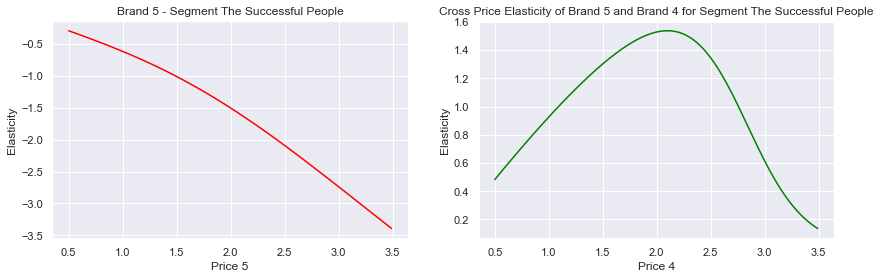

In [81]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(prange, own_price_elasticity_brand_5_seg3, color = 'red')
axs[0].set_title('Brand 5 - Segment The Successful People')
axs[0].set_xlabel('Price 5')

axs[1].plot(prange, brand5_cross_brand4_price_elasticity_seg3, color = 'green')
axs[1].set_title('Cross Price Elasticity of Brand 5 and Brand 4 for Segment The Successful People')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity') 

Results:
* Both show the same price range. Only the first one refers to changes in price5 and the 2nd 4
* The Successful People customers are elastic to the brand5, as they already prefer brand4
* Positive cross brand elasticity which measn that brand4 is a substitute for brand5

* If brand 4 lowers the price by 1%, the purchase probability for brand5 will fall by 1.5%
* In that case, brand5 should lower its own price by 1% which will be reflected in 2% increase in purchase probability
* The net effect of the 2 price decreases is 2% -1.5% or +0.5%

=>How to keep the purchase probability constant for brand5?
   * x.2=1.5% (x is the decrease in price required to reach 1.5% increase in purchase probability and thus keep a stable probability after the decrease to the competitor price change )
    * x=0.75% (not lost of a single customer)

#### Segment0: The Housewives

In [82]:
brand_seg0 = df_incidence[df_incidence['Incidence'] == 1]
brand_seg0 = brand_seg0[brand_seg0['Segment'] == 0]

#Building the model.
Y = brand_seg0['Brand']
brand_seg0 = pd.get_dummies(brand_seg0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_seg0[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
log_model_brand_seg0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
log_model_brand_seg0 .fit(X, Y)

#Coefficients table for segment 0
brand_coef = pd.DataFrame(np.transpose(log_model_brand_seg0.coef_))
brand_coef.columns = [coefficients]
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)

##### Own Brand Price Elasticity

In [83]:
df_own_brand_5_seg0 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_5_seg0['Price_1'] = brand_seg0['Price_1'].mean()
df_own_brand_5_seg0['Price_2'] = brand_seg0['Price_2'].mean()
df_own_brand_5_seg0['Price_3'] = brand_seg0['Price_3'].mean()
df_own_brand_5_seg0['Price_4'] = brand_seg0['Price_4'].mean()
df_own_brand_5_seg0['Price_5'] = prange

predict_own_brand_5_seg0 = log_model_brand_seg0.predict_proba(df_own_brand_5_seg0)
pr_own_brand_5_seg0 = predict_own_brand_5_seg0[: ][: , 4]

own_price_elasticity_brand_5_seg0 =  beta5 * prange * (1 - pr_own_brand_5_seg0)
df_price_elasticity['Brand 5 Segment 0'] = own_price_elasticity_brand_5_seg0

##### Cross Brand Price Elasticity

In [84]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for segment0.
df_brand5_cross_brand4_seg0 = pd.DataFrame(index = np.arange(prange.size))
df_brand5_cross_brand4_seg0['Price_1'] = brand_seg0['Price_1'].mean()
df_brand5_cross_brand4_seg0['Price_2'] = brand_seg0['Price_2'].mean()
df_brand5_cross_brand4_seg0['Price_3'] = brand_seg0['Price_3'].mean()
df_brand5_cross_brand4_seg0['Price_4'] = prange
df_brand5_cross_brand4_seg0['Price_5'] = brand_seg0['Price_5'].mean()

predict_brand5_cross_brand4_seg0 = log_model_brand_seg0.predict_proba(df_brand5_cross_brand4_seg0)
pr_cross_brand_5_seg0 = predict_brand5_cross_brand4_seg0[: ][: , 3]

brand5_cross_brand4_price_elasticity_seg0 = -beta5 * prange * pr_cross_brand_5_seg0
df_price_elasticity['Brand 5 Cross Brand 4 Seg0'] = brand5_cross_brand4_price_elasticity_seg0

#### Segment1: The Career Driven

In [85]:
brand_seg1 = df_incidence[df_incidence['Incidence'] == 1]
brand_seg1 = brand_seg1[brand_seg1['Segment'] == 1]

#Building the model.
Y = brand_seg1['Brand']
brand_seg1 = pd.get_dummies(brand_seg1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_seg1[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
log_model_brand_seg1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
log_model_brand_seg1 .fit(X, Y)

#Coefficients table for segment 0
brand_coef = pd.DataFrame(np.transpose(log_model_brand_seg1.coef_))
brand_coef.columns = [coefficients]
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)

##### Own Brand Price Elasticity

In [86]:
df_own_brand_5_seg1 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_5_seg1['Price_1'] = brand_seg1['Price_1'].mean()
df_own_brand_5_seg1['Price_2'] = brand_seg1['Price_2'].mean()
df_own_brand_5_seg1['Price_3'] = brand_seg1['Price_3'].mean()
df_own_brand_5_seg1['Price_4'] = brand_seg1['Price_4'].mean()
df_own_brand_5_seg1['Price_5'] = prange

predict_own_brand_5_seg1 = log_model_brand_seg1.predict_proba(df_own_brand_5_seg1)
pr_own_brand_5_seg1 = predict_own_brand_5_seg1[: ][: , 4]

own_price_elasticity_brand_5_seg1 =  beta5 * prange * (1 - pr_own_brand_5_seg1)
df_price_elasticity['Brand 5 Segment 1'] = own_price_elasticity_brand_5_seg1

##### Cross Brand Price Elasticity

In [87]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for segment1.
df_brand5_cross_brand4_seg1 = pd.DataFrame(index = np.arange(prange.size))
df_brand5_cross_brand4_seg1['Price_1'] = brand_seg1['Price_1'].mean()
df_brand5_cross_brand4_seg1['Price_2'] = brand_seg1['Price_2'].mean()
df_brand5_cross_brand4_seg1['Price_3'] = brand_seg1['Price_3'].mean()
df_brand5_cross_brand4_seg1['Price_4'] = prange
df_brand5_cross_brand4_seg1['Price_5'] = brand_seg1['Price_5'].mean()

predict_brand5_cross_brand4_seg1 = log_model_brand_seg1.predict_proba(df_brand5_cross_brand4_seg1)
pr_cross_brand_5_seg1 = predict_brand5_cross_brand4_seg1[: ][: , 3]

brand5_cross_brand4_price_elasticity_seg1= -beta5 * prange * pr_cross_brand_5_seg1
df_price_elasticity['Brand 5 Cross Brand 4 Seg1'] = brand5_cross_brand4_price_elasticity_seg1

#### Segment2: The Less Fortunate

In [88]:
brand_seg2 = df_incidence[df_incidence['Incidence'] == 1]
brand_seg2 = brand_seg2[brand_seg2['Segment'] == 2]

#Building the model.
Y = brand_seg2['Brand']
brand_seg2 = pd.get_dummies(brand_seg2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_seg2[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
log_model_brand_seg2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
log_model_brand_seg2 .fit(X, Y)

#Coefficients table for segment 1
brand_coef = pd.DataFrame(np.transpose(log_model_brand_seg2.coef_))
brand_coef.columns = [coefficients]
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)

##### Own Brand Price Elasticity

In [89]:
df_own_brand_5_seg2 = pd.DataFrame(index = np.arange(prange.size))
df_own_brand_5_seg2['Price_1'] = brand_seg2['Price_1'].mean()
df_own_brand_5_seg2['Price_2'] = brand_seg2['Price_2'].mean()
df_own_brand_5_seg2['Price_3'] = brand_seg2['Price_3'].mean()
df_own_brand_5_seg2['Price_4'] = brand_seg2['Price_4'].mean()
df_own_brand_5_seg2['Price_5'] = prange

predict_own_brand_5_seg2 = log_model_brand_seg1.predict_proba(df_own_brand_5_seg2)
pr_own_brand_5_seg2 = predict_own_brand_5_seg2[: ][: , 4]

own_price_elasticity_brand_5_seg2 =  beta5 * prange * (1 - pr_own_brand_5_seg2)
df_price_elasticity['Brand 5 Segment 2'] = own_price_elasticity_brand_5_seg2

##### Cross Brand Price Elasticity

In [90]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for segment2.
df_brand5_cross_brand4_seg2 = pd.DataFrame(index = np.arange(prange.size))
df_brand5_cross_brand4_seg2['Price_1'] = brand_seg2['Price_1'].mean()
df_brand5_cross_brand4_seg2['Price_2'] = brand_seg2['Price_2'].mean()
df_brand5_cross_brand4_seg2['Price_3'] = brand_seg2['Price_3'].mean()
df_brand5_cross_brand4_seg2['Price_4'] = prange
df_brand5_cross_brand4_seg2['Price_5'] = brand_seg2['Price_5'].mean()

predict_brand5_cross_brand4_seg2 = log_model_brand_seg2.predict_proba(df_brand5_cross_brand4_seg2)
pr_cross_brand_5_seg2 = predict_brand5_cross_brand4_seg2[: ][: , 3]

brand5_cross_brand4_price_elasticity_seg2= -beta5 * prange * pr_cross_brand_5_seg2
df_price_elasticity['Brand 5 Cross Brand 4 Seg2'] = brand5_cross_brand4_price_elasticity_seg2
pd.options.display.max_rows = None
df_price_elasticity

,Price Point,Mean Price Elasticity,PE. of Segment 0,PE. of Segment 1,PE. of Segment 2,PE. of Segment 3,Elasticity with Promotion,Elasticity With No Promotion,Brand_1,Brand_2,...,Brand_5,Brand 5 Cross Brand 4,Brand 5 Segment 3,Brand 5 Cross Brand 4 Seg3,Brand 5 Segment 0,Brand 5 Cross Brand 4 Seg0,Brand 5 Segment 1,Brand 5 Cross Brand 4 Seg1,Brand 5 Segment 2,Brand 5 Cross Brand 4 Seg2
0,0.50,-0.10,-0.21,-0.12,-0.03,-0.17,-0.13,-0.20,-0.29,-0.11,...,-0.05,0.33,-0.30,0.48,-0.12,0.17,-0.04,0.19,-0.05,0.18
1,0.51,-0.10,-0.22,-0.12,-0.03,-0.17,-0.13,-0.20,-0.31,-0.11,...,-0.05,0.34,-0.30,0.49,-0.12,0.18,-0.05,0.20,-0.05,0.18
2,0.52,-0.10,-0.22,-0.13,-0.03,-0.18,-0.13,-0.21,-0.33,-0.12,...,-0.05,0.34,-0.31,0.50,-0.12,0.18,-0.05,0.20,-0.05,0.19
3,0.53,-0.11,-0.23,-0.13,-0.04,-0.18,-0.14,-0.21,-0.35,-0.12,...,-0.05,0.35,-0.32,0.51,-0.13,0.18,-0.05,0.20,-0.05,0.19
4,0.54,-0.11,-0.24,-0.14,-0.04,-0.19,-0.14,-0.22,-0.37,-0.13,...,-0.06,0.35,-0.32,0.52,-0.13,0.18,-0.05,0.20,-0.05,0.19
5,0.55,-0.12,-0.25,-0.14,-0.04,-0.19,-0.15,-0.23,-0.39,-0.13,...,-0.06,0.36,-0.33,0.53,-0.13,0.18,-0.05,0.21,-0.05,0.19
6,0.56,-0.12,-0.25,-0.15,-0.04,-0.20,-0.15,-0.23,-0.41,-0.14,...,-0.06,0.36,-0.33,0.54,-0.13,0.19,-0.05,0.21,-0.05,0.19
7,0.57,-0.13,-0.26,-0.15,-0.05,-0.20,-0.16,-0.24,-0.43,-0.14,...,-0.06,0.37,-0.34,0.55,-0.14,0.19,-0.05,0.21,-0.05,0.20
8,0.58,-0.13,-0.27,-0.16,-0.05,-0.21,-0.16,-0.25,-0.46,-0.15,...,-0.06,0.37,-0.35,0.56,-0.14,0.19,-0.05,0.21,-0.05,0.20
9,0.59,-0.14,-0.27,-0.16,-0.05,-0.21,-0.17,-0.25,-0.48,-0.15,...,-0.06,0.38,-0.35,0.57,-0.14,0.19,-0.05,0.22,-0.06,0.20


#### Vizualizing the Results of Cross Price Elasticity by Segment

- Plotting the own and cross brand price elasticities for the average customer and each of the four segments.
- Useful to examine their preference, when it comes to brand choice.

Text(0.5, 0, 'Price 4')

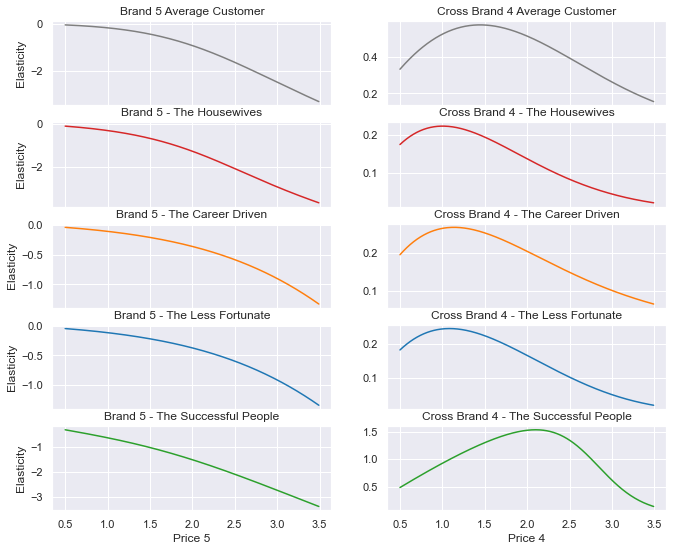

In [91]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(prange, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(prange, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(prange, own_price_elasticity_brand_5_seg0, 'tab:red')
ax2[0].set_title('Brand 5 - The Housewives')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(prange, brand5_cross_brand4_price_elasticity_seg0, 'tab:red')
ax2[1].set_title('Cross Brand 4 - The Housewives')

ax3[0].plot(prange, own_price_elasticity_brand_5_seg1, 'tab:orange')
ax3[0].set_title('Brand 5 - The Career Driven')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(prange, brand5_cross_brand4_price_elasticity_seg1, 'tab:orange')
ax3[1].set_title('Cross Brand 4 - The Career Driven')

ax4[0].plot(prange, own_price_elasticity_brand_5_seg2, 'tab:blue')
ax4[0].set_title('Brand 5 - The Less Fortunate')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(prange, brand5_cross_brand4_price_elasticity_seg2, 'tab:blue')
ax4[1].set_title('Cross Brand 4 - The Less Fortunate')

ax5[0].plot(prange, own_price_elasticity_brand_5_seg3, 'tab:green')
ax5[0].set_title('Brand 5 - The Successful People')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(prange, brand5_cross_brand4_price_elasticity_seg3, 'tab:green')
ax5[1].set_title('Cross Brand 4 - The Successful People')
ax5[1].set_xlabel('Price 4')

Results:
- The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Successful people and the Career Driven. They are also the segments which purchase this brand most often. 
- The Career Driven segment is the most inelastic and they are the most loyal segment. 
- Based on the model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
- without fear of significant loss of customers from this segment. 
- The Successful People segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
- In order to target this segment, the analysis signals, that price needs to be decreased. However, it's important to keep in mind that other factors aside from price might be influencing the purchase behaivour of this segment.

The Housewives Segment: 
- the average consumer is more elastic when compared to The Housewives segment.
- The differenceis even more pronounced comparing The Housewives segment to the Career Driven and Successful People segment in the price range two 2.1 to 2.8
- The elasticity is between -1.4  and -2.7. Therefore, its purchase probability for the brand 5 is elastic for the entire observed price range of the brand.
- => Marketing strategy should be to lower prices in this price range to increase the purchase probability for this segment.
- => However a marketing strategy based on this segment might not be interested as it is not homegeneous

The Career Driven Segment:
- The least elastic among.
- They seem to be inelastic throughout the whole price range.
- Not really affected by the increase in the price of the own brand.
- Cross price elasticity also has extremely low values. Unlikely to switch to the competotor
- loyal to the brand 5
- => Prices could be increased without fearing to loose too much market share

The Less Fortunate Segment:
- Their elasticity curve seems to differ when compared to the rest of the segments.
- The brand 5 price elasticity has a more pronounced shape.
- This segment seems to be inelastic at lower price points, and then they rapidly become the most elastic at higher prices.
- For the whole natural domain of the brand 5 prices, they are rather elastic in terms of cross price elasticity.
- This segment almost never buys brand 5 or indeed brand 4 (Based on descriptive analytics).
- This should not be the segment to build the conclusions based on because there is not enough data about their behavior
- These are not a target group
    
- => Career Driven and Successful People segments require the most attention from brand 5 marketing team.

- The Successful People segment is much more elastic than the career Driven.
- If there is an increase in brand 5 prices, this would barely affect the Career Driven segment, but would seriously damage the Successful People segment sales.
- If Brand 4 were to decrease their price, that would affect the Successful People segment, as discussed before, but not the Career Driven one. Therefore, a tiny decrease in brand 5 pricing would compensate such a competitive move.
 